In [33]:
import numpy as np
import os
# A 2D plotting library that enables users to create a wide variety of high-quality plots and visualizations.
# We will be using this library to display our maze in a visually appealing way.
import matplotlib.pyplot as plt

# A library that provides various functions for working with time-related operations. We will be using this library
# to give us time to look at how the agent is progressing through the maze
import time
import pickle

In [34]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialize Maze object with the provided maze, start_position, and goal position
        self.maze = maze
        self.maze_height = maze_layout.shape[0] # Get the height of the maze (number of rows)

        self.maze_width = maze_layout.shape[1]  # Get the width of the maze (number of columns)
        self.start_position = start_position    # Set the start position in the maze as a tuple (x, y)
        self.goal_position = goal_position      # Set the goal position in the maze as a tuple (x, y)

    def show_maze(self):
        # Visualize the maze using Matplotlib
        plt.figure(figsize=(5,5))

        # Display the maze as an image in grayscale ('gray' colormap)
        plt.imshow(self.maze, cmap='gray')

        # Add start and goal positions as 'S' and 'G'
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

        # Remove ticks and labels from the axes
        plt.xticks([]), plt.yticks([])

        # Show the plot
        plt.show()

In [35]:
from PIL import Image

def generate_matrix(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to grayscale
    gray_image = image.convert("L")

    # Define the block size (20x20 pixels)
    block_size = 20
    num_blocks = gray_image.size[0] // block_size  # Number of blocks (21x21)

    # Initialize the matrix
    mapped_matrix = np.zeros((num_blocks, num_blocks), dtype=int)

    # Process each block
    for i in range(num_blocks):
        for j in range(num_blocks):
            # Get the coordinates of the block
            block = gray_image.crop((j * block_size, i * block_size, (j + 1) * block_size, (i + 1) * block_size))

            # Calculate the average color in the block
            avg_color = np.mean(block)

            # If the average color is closer to white (255), mark the block as 1, else 0
            mapped_matrix[i, j] = 1 if avg_color > 128 else 0

    return mapped_matrix


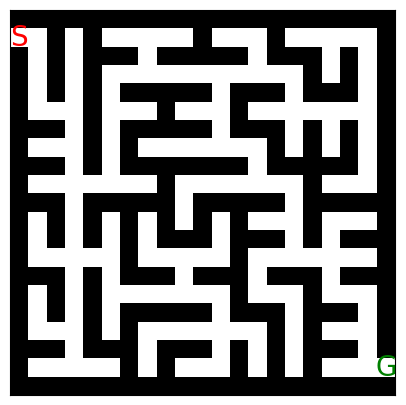

In [36]:
maze_layout=generate_matrix("E:/Major_project/Major Project/Major Project/Final_model/archive/3.png")
# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0, 1), (20, 19))
# Visualize the maze
# print(maze_layout[0,1])
maze.show_maze()

## DFS

In [37]:
# Define the DFS function
def dfs(maze, x, y, path, visited):
    # Get the size of the maze
    rows, cols = len(maze), len(maze[0])
    
    # If out of bounds or hit a wall (0) or already visited
    if x < 0 or y < 0 or x >= rows or y >= cols or maze[x][y] == 0 or visited[x][y]:
        return False
    
    # Mark current cell as visited
    visited[x][y] = True
    
    # Add the current position to the path
    path.append((y, x))
    
    # If the exit is reached, return True (found the path)
    if x == 19 and y == 20:  # Updated exit point based on the matrix
        return True
    
    # Explore neighbors: down, up, right, left
    if dfs(maze, x + 1, y, path, visited):  # Move down
        return True
    if dfs(maze, x - 1, y, path, visited):  # Move up
        return True
    if dfs(maze, x, y + 1, path, visited):  # Move right
        return True
    if dfs(maze, x, y - 1, path, visited):  # Move left
        return True
    
    # If no path is found, backtrack: remove the last position from the path
    path.pop()
    return False

# Solve the maze function
def solve_maze(maze):
    # Initialize visited matrix with the same size as the maze, filled with False
    visited = [[False for _ in range(len(maze[0]))] for _ in range(len(maze))]
    
    # This list will store the path
    path = []
    
    # Start DFS from the valid start point (1, 0)
    if dfs(maze, 1, 0, path, visited):
        return path  # Return the path if a solution is found
    else:
        return None  # No solution

# Maze input
maze = maze_layout

# Find and print the solution path
path = solve_maze(maze)
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (12, 7), (13, 7), (13, 8), (13, 9), (14, 9), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (16, 13), (17, 13), (17, 14), (17, 15), (18, 15), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (20, 19)]


## BFS

In [38]:
from collections import deque


# BFS function to solve the maze
def bfs(maze, start, end):
    # Get the size of the maze
    rows, cols = len(maze), len(maze[0])
    
    # Initialize visited matrix
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    
    # Define possible moves: down, up, right, left
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    # Initialize queue with the starting point and the path to reach it
    queue = deque([(start, [start])])  # (position, path)
    
    # Mark the start position as visited
    visited[start[0]][start[1]] = True
    
    # Perform BFS
    while queue:
        (x, y), path = queue.popleft()
        
        # If we've reached the end, return the path with (column, row) format
        if (x, y) == end:
            return [(y, x) for x, y in path]  # Swap (x, y) to (y, x)
        
        # Explore neighbors in all four directions
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            # Check if the new position is within bounds, is a path (1), and not visited
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 1 and not visited[nx][ny]:
                visited[nx][ny] = True  # Mark the new cell as visited
                queue.append(((nx, ny), path + [(nx, ny)]))  # Add the new position and updated path to the queue
    
    # If no path is found, return None
    return None

# Solve the maze function
def solve_maze_bfs(maze):
    start = (1, 0)  # Starting point
    end = (19, 20)  # Ending point
    
    # Find and return the solution path using BFS
    return bfs(maze, start, end)

# Maze input
maze = maze_layout

# Find and print the solution path
path = solve_maze_bfs(maze)
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (12, 7), (13, 7), (13, 8), (13, 9), (14, 9), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (16, 13), (17, 13), (17, 14), (17, 15), (18, 15), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (20, 19)]


## A*

In [39]:
import heapq

# Heuristic function: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* algorithm to solve the maze
def a_star(maze, start, end):
    # Get the size of the maze
    rows, cols = len(maze), len(maze[0])
    
    # Initialize the open list (min-heap priority queue) and closed set
    open_list = []
    heapq.heappush(open_list, (0, start))  # (priority, position)
    
    came_from = {}  # To reconstruct the path
    g_score = {start: 0}  # Cost from start to the current node
    f_score = {start: heuristic(start, end)}  # Estimated cost from start to end
    
    # Define possible moves: down, up, right, left
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    while open_list:
        # Get the current node with the lowest f_score
        _, current = heapq.heappop(open_list)
        
        # If we've reached the end, reconstruct the path
        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return [(y, x) for x, y in path]  # Swap (x, y) to (y, x)
        
        # Explore neighbors
        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            x, y = neighbor
            
            # Check if the neighbor is within bounds and is a path (1)
            if 0 <= x < rows and 0 <= y < cols and maze[x][y] == 1:
                tentative_g_score = g_score[current] + 1  # Cost to neighbor
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                    
                    # Push the neighbor to the open list with updated f_score
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    
    # If no path is found, return None
    return None

# Solve the maze function using A* algorithm
def solve_maze_a_star(maze):
    start = (1, 0)  # Starting point
    end = (19, 20)  # Ending point
    
    # Find and return the solution path using A*
    return a_star(maze, start, end)

# Maze input
maze = maze_layout

# Find and print the solution path
path = solve_maze_a_star(maze)
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (12, 7), (13, 7), (13, 8), (13, 9), (14, 9), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (16, 13), (17, 13), (17, 14), (17, 15), (18, 15), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (20, 19)]


## Dijkstra

In [40]:
import heapq

# Dijkstra algorithm to solve the maze
def dijkstra(maze, start, end):
    # Get the size of the maze
    rows, cols = len(maze), len(maze[0])
    
    # Initialize the priority queue (min-heap) and distances
    open_list = []
    heapq.heappush(open_list, (0, start))  # (distance, position)
    
    distances = {start: 0}  # Distance from start to each node
    came_from = {}  # To reconstruct the path
    
    # Define possible moves: down, up, right, left
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    while open_list:
        # Get the current node with the shortest distance
        current_distance, current = heapq.heappop(open_list)
        
        # If we've reached the end, reconstruct the path
        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return [(y, x) for x, y in path]  # Swap (x, y) to (y, x)
        
        # Explore neighbors
        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            x, y = neighbor
            
            # Check if the neighbor is within bounds and is a path (1)
            if 0 <= x < rows and 0 <= y < cols and maze[x][y] == 1:
                distance = current_distance + 1  # Each step has a cost of 1
                
                # If a shorter path to the neighbor is found
                if neighbor not in distances or distance < distances[neighbor]:
                    distances[neighbor] = distance
                    came_from[neighbor] = current
                    heapq.heappush(open_list, (distance, neighbor))
    
    # If no path is found, return None
    return None

# Solve the maze function using Dijkstra algorithm
def solve_maze_dijkstra(maze):
    start = (1, 0)  # Starting point
    end = (19, 20)  # Ending point
    
    # Find and return the solution path using Dijkstra
    return dijkstra(maze, start, end)

# Maze input
maze = maze_layout

# Find and print the solution path
path = solve_maze_dijkstra(maze)
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (5, 9), (5, 8), (5, 7), (5, 6), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (12, 7), (13, 7), (13, 8), (13, 9), (14, 9), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (16, 13), (17, 13), (17, 14), (17, 15), (18, 15), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (20, 19)]


## Floyd-Warshall

In [ ]:
INF = float('inf')

def floyd_warshall(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    size = rows * cols
    
    # Convert 2D coordinates to 1D index
    def pos_to_index(x, y):
        return x * cols + y
    
    # Convert 1D index back to 2D coordinates
    def index_to_pos(index):
        return index // cols, index % cols
    
    # Initialize distance matrix with INF
    dist = [[INF] * size for _ in range(size)]
    
    # Initialize the adjacency matrix (self-loops have distance 0)
    for i in range(size):
        dist[i][i] = 0
    
    # Define possible moves: down, up, right, left
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    # Build the graph by adding edges for valid neighbors
    for x in range(rows):
        for y in range(cols):
            if maze[x][y] == 1:  # Only consider valid paths (1's)
                current_index = pos_to_index(x, y)
                for dx, dy in directions:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 1:
                        neighbor_index = pos_to_index(nx, ny)
                        dist[current_index][neighbor_index] = 1
                        dist[neighbor_index][current_index] = 1
    
    # Floyd-Warshall algorithm
    for k in range(size):
        for i in range(size):
            for j in range(size):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    
    # Extract the shortest path distance from start to end
    start_index = pos_to_index(start[0], start[1])
    end_index = pos_to_index(end[0], end[1])
    
    if dist[start_index][end_index] == INF:
        return None
    
    # Reconstruct the shortest path (optional for this algorithm)
    path = []
    current = start_index
    while current != end_index:
        path.append(index_to_pos(current))
        # Find the next step in the shortest path
        for neighbor in range(size):
            if dist[start_index][neighbor] + 1 == dist[start_index][current]:
                current = neighbor
                break
    path.append(index_to_pos(end_index))
    
    return [(y, x) for x, y in path]  # Convert to (column, row) format

# Solve the maze function using Floyd-Warshall algorithm
def solve_maze_floyd_warshall(maze):
    start = (1, 0)  # Starting point
    end = (19, 20)  # Ending point
    
    # Find and return the solution path using Floyd-Warshall
    return floyd_warshall(maze, start, end)

# Maze input
maze = maze_layout

# Find and print the solution path
path = solve_maze_floyd_warshall(maze)
if path:
    print("Path found:", path)
else:
    print("No path found")


In [41]:
def generate_movement_instructions(path):

    instructions = []

    for i in range(len(path) - 1):
        start_x, start_y = path[i]
        end_x, end_y = path[i + 1]

        # Determine the direction and distance for this segment
        if start_x < end_x and start_y == end_y:  # Move forward
            direction = "forward"
            distance = end_x - start_x
        elif start_x == end_x and start_y < end_y:  # Turn right
            direction = "right"
            distance = end_y - start_y
        elif start_x == end_x and start_y > end_y:  # Turn left
            direction = "left"
            distance = start_y - end_y
        else:
            direction = "right"
            distance = start_x - end_x

        # Move in the determined direction
        while distance > 0:
            instructions.append(("moveForward"))
            distance -= 1

        # Turn if necessary for the next segment
        if i < len(path) - 2:
            next_x, next_y = path[i + 2]
            if direction == "forward" and next_y != end_y:
                instructions.append(("turnRight" if next_y > end_y else "turnLeft"))
            elif direction == "right" and next_x != end_x:
                instructions.append(("turnLeft"))
            elif direction == "left" and next_x != end_x:
                instructions.append(("turnRight"))

    return instructions

instructions = generate_movement_instructions(path)
with open('Path.txt','w') as file:
    file.write("\n".join(instructions))
print(instructions)

['moveForward', 'turnRight', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'turnLeft', 'moveForward', 'moveForward', 'turnRight', 'moveForward', 'moveForward', 'moveForward', 'moveForward', 'turnLeft', 'moveForward']
